## **QUESTION 1: TASK 1** 




In [5]:
# importing all the necessary modules
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import re, string, unicodedata
from collections import Counter
from wordcloud import WordCloud
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
!pip install ekphrasis
!pip install tweet-preprocessor
import preprocessor as p
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
nltk.download('vader_lexicon')
nltk.download('punkt')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
#DOING THIS BECAUSE THE CSV FILE WAS CRASHING ON MY LAPTOP
# input excel file path
inputExcelFile ="/content/chatgpt1.xlsx"

# Reading an excel file
excelFile = pd.read_excel (inputExcelFile)

# Converting excel file into CSV file
excelFile.to_csv ("ResultCsvFile.csv", index = None, header=True)

# Reading and Converting the output csv file into a dataframe object
dataset = pd.DataFrame(pd.read_csv("ResultCsvFile.csv"))

# Displaying the dataframe object
dataset.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871689984,ChatGPTã§éŠã¶ã®å¿˜ã‚Œã¦ãŸï¼ï¼\næ›¸é¡žä...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1617156270871689984,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:39+00:00,1617156291046129920,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1617148639993799936,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0
2,2023-01-22 13:44:44+00:00,1617156308926340096,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926340096,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
3,2023-01-22 13:44:49+00:00,1617156332297250048,Bow down to chatGPT ðŸ«¡..... https://t.co/ENT...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,2,0,1617156332297250048,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0
4,2023-01-22 13:44:52+00:00,1617156345064570112,"Profilinde vatan, TÃ¼rkiye falan yazan bireyle...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,4,0,1617156345064570112,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0


In [3]:
# Fill missing values with a specific value, such as "Unknown"
dataset = dataset.fillna("Unknown")

# Replace empty lists with None
dataset['hashtag'] = dataset['hashtag'].apply(lambda x: None if x == '[]' else x)


dataset.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871689984,ChatGPTã§éŠã¶ã®å¿˜ã‚Œã¦ãŸï¼ï¼\næ›¸é¡žä...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,Unknown,Unknown,1,0,5,0,1617156270871689984,ja,"<a href=""http://twitter.com/download/iphone"" r...",Unknown,Unknown,Unknown,None,0
1,2023-01-22 13:44:39+00:00,1617156291046129920,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,Unknown,Unknown,1,0,5,0,1617148639993799936,en,"<a href=""http://twitter.com/download/iphone"" r...",Unknown,Unknown,"[User(username='AlexandrovnaIng', id=282705900...",None,0
2,2023-01-22 13:44:44+00:00,1617156308926340096,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926340096,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
3,2023-01-22 13:44:49+00:00,1617156332297250048,Bow down to chatGPT ðŸ«¡..... https://t.co/ENT...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,2,0,1617156332297250048,en,"<a href=""http://twitter.com/download/android"" ...",Unknown,https://twitter.com/agadmator/status/161715501...,Unknown,None,0
4,2023-01-22 13:44:52+00:00,1617156345064570112,"Profilinde vatan, TÃ¼rkiye falan yazan bireyle...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,Unknown,Unknown,0,0,4,0,1617156345064570112,tr,"<a href=""http://twitter.com/download/iphone"" r...",Unknown,Unknown,Unknown,None,0


**I didnot do the counts because it was extra work that was slowing the system down**

 **I realised that in the dataset the tweets were different languages too. Therefore, i decided to use only the tweet which are english in order to perform Sentiment Analysis and all the other tasks**

In [6]:
# Drop duplicate rows and rows with missing values in one line
dataset = dataset.drop_duplicates(subset='Text').dropna()


# Fill missing values with a specific value, such as "Unknown"
dataset = dataset.fillna("Unknown")

# Replace empty lists with None
dataset['hashtag'] = dataset['hashtag'].apply(lambda x: None if x == '[]' else x)


dataset.head()


,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
2,2023-01-22 13:44:44+00:00,1617156308926340096,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926340096,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
8,2023-01-22 13:45:06+00:00,1617156404137289984,I created a fictional jewelry brand using Chat...,Kosuke_dazo,https://twitter.com/Kosuke_dazo/status/1617156...,https://twitter.com/Kosuke_dazo,['https://oriori.my.canva.site/'],['https://t.co/gtWdNZ0laM'],0,1,2,1,1617156404137289984,en,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,Unknown,Unknown,"['#ChatGPT', '#midjourney']",2
9,2023-01-22 13:45:07+00:00,1617156405869370112,It will look similar to irobot. The company wi...,EricRIngram,https://twitter.com/EricRIngram/status/1617156...,https://twitter.com/EricRIngram,Unknown,Unknown,0,0,0,0,1617156405869370112,en,"<a href=""http://twitter.com/download/android"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,Unknown,Unknown,['#ChatGPT'],1
11,2023-01-22 13:45:08+00:00,1617156410634010112,AI will initiate a new era of entrepreneurship...,IsEgaley,https://twitter.com/IsEgaley/status/1617156410...,https://twitter.com/IsEgaley,['https://open.substack.com/pub/adseq/p/ai-wil...,['https://t.co/yxpj9w7QcY'],0,0,0,0,1617156410634010112,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Unknown,Unknown,Unknown,"['#ChatGPT', '#visionary', '#ArtificialIntelli...",4
14,2023-01-22 13:45:14+00:00,1617156438706550016,#ChatGPT wydaje na operacjÄ™ w chmurze 3 mln d...,PetrosTovmasyan,https://twitter.com/PetrosTovmasyan/status/161...,https://twitter.com/PetrosTovmasyan,Unknown,Unknown,4,1,5,1,1617156438706550016,pl,"<a href=""http://twitter.com/download/android"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,Unknown,"[User(username='Microsoft', id=74286565, displ...",['#ChatGPT'],1


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

**STEP 3 FROM GUIDE** 

In [8]:
x = dataset['Text']
y = dataset['Language']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**STEP 4 FROM GUIDE: Vectorising the Texts using Bag of Words and TF-IDF**

In [9]:
vectorizer = CountVectorizer(stop_words='english')
x_train_bow = vectorizer.fit_transform(x_train)
x_test_bow = vectorizer.transform(x_test)


In [10]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
X_test_tfidf = tfidf_vectorizer.transform(x_test)


# **TASK 1: SENTIMENTAL ANALYSIS WITH VISUALISATION**

In [15]:
def preprocessing_text(text):
    if isinstance(text, str):  # Check if text is a string
        # Remove URLs
        text = re.sub(r"http\S+|www\S+|https\S+", "", text)

        # Remove usernames starting with @
        text = re.sub(r"@[^\s]+", "", text)

        # Remove non-alphanumeric characters and convert to lowercase
        text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())

        # Tokenize the text
        tokens = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words("english"))
        filtered_tokens = [token for token in tokens if token not in stop_words]

        # Join the tokens back into a single string
        processed_text = " ".join(filtered_tokens)

        return processed_text
    else:
        return ""  # Return an empty string for non-string inputs

In [19]:
# Apply preprocessing to the "Text" column
dataset["ProcessedText"] = dataset["Text"].apply(preprocessing_text)
print(dataset["ProcessedText"])

2        schaut euch alles auf die piste bringt um euch...
8        created fictional jewelry brand using chatgpt ...
9        look similar irobot company install mini fridg...
11       ai initiate new era entrepreneurship thesis ch...
14       chatgpt wydaje na operacj w chmurze 3 mln dola...
                               ...                        
49992            think chatgpt taking piss lastweektonight
49993    digital marketers adopt new skills artificial ...
49995    remember lot early years cause many people usi...
49996    chatgpt ist ein chatbot der durch k nstliche i...
49998    5 minuti di chatgpt e ho capito che apprende m...
Name: ProcessedText, Length: 13526, dtype: object


In [20]:
sentiment_analysis = SentimentIntensityAnalyzer()

#the conditions for Labelling the preprocessed texts
#Positive: 1, Neutral: 0, Negative: -1
def sentiment_type(tweet):
    try:
        if sentiment_analysis.polarity_scores(tweet)['compound'] > 0:
            return "Positive"
        elif sentiment_analysis.polarity_scores(tweet)['compound'] < 0:
            return "Negative"
        else:
            return "Neutral"
    except:
        return "Neutral"

In [21]:
#Adding the new sentimented texts into the dataset with their labels
dataset['Sentimented_Texts'] = dataset['Text'].apply(lambda x: sentiment_type(x))

In [22]:
dataset['Sentimented_Texts'].value_counts()

Neutral     6744
Positive    4849
Negative    1933
Name: Sentimented_Texts, dtype: int64

In [23]:
dataset.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,...,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts,ProcessedText,Sentimented_Texts
2,2023-01-22 13:44:44+00:00,1617156308926340096,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,...,1617156308926340096,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1,schaut euch alles auf die piste bringt um euch...,Negative
8,2023-01-22 13:45:06+00:00,1617156404137289984,I created a fictional jewelry brand using Chat...,Kosuke_dazo,https://twitter.com/Kosuke_dazo/status/1617156...,https://twitter.com/Kosuke_dazo,['https://oriori.my.canva.site/'],['https://t.co/gtWdNZ0laM'],0,1,...,1617156404137289984,en,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,Unknown,Unknown,"['#ChatGPT', '#midjourney']",2,created fictional jewelry brand using chatgpt ...,Positive
9,2023-01-22 13:45:07+00:00,1617156405869370112,It will look similar to irobot. The company wi...,EricRIngram,https://twitter.com/EricRIngram/status/1617156...,https://twitter.com/EricRIngram,Unknown,Unknown,0,0,...,1617156405869370112,en,"<a href=""http://twitter.com/download/android"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,Unknown,Unknown,['#ChatGPT'],1,look similar irobot company install mini fridg...,Positive
11,2023-01-22 13:45:08+00:00,1617156410634010112,AI will initiate a new era of entrepreneurship...,IsEgaley,https://twitter.com/IsEgaley/status/1617156410...,https://twitter.com/IsEgaley,['https://open.substack.com/pub/adseq/p/ai-wil...,['https://t.co/yxpj9w7QcY'],0,0,...,1617156410634010112,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Unknown,Unknown,Unknown,"['#ChatGPT', '#visionary', '#ArtificialIntelli...",4,ai initiate new era entrepreneurship thesis ch...,Neutral
14,2023-01-22 13:45:14+00:00,1617156438706550016,#ChatGPT wydaje na operacjÄ™ w chmurze 3 mln d...,PetrosTovmasyan,https://twitter.com/PetrosTovmasyan/status/161...,https://twitter.com/PetrosTovmasyan,Unknown,Unknown,4,1,...,1617156438706550016,pl,"<a href=""http://twitter.com/download/android"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,Unknown,"[User(username='Microsoft', id=74286565, displ...",['#ChatGPT'],1,chatgpt wydaje na operacj w chmurze 3 mln dola...,Neutral


In [46]:
def plots(df, feature, title):
    counts = df[feature].value_counts()
    fig, ax = plt.subplots(figsize=(8, 5))
    
    colors = ["yellow", "green", "red"]
    counts.plot(kind='bar', ax=ax, color=colors)
    ax.set_ylabel(f'Counts: {title} sentiments', size=12)
    ax.set_title(f"Sentiment Analysis: {title}", size=14)
    plt.show()

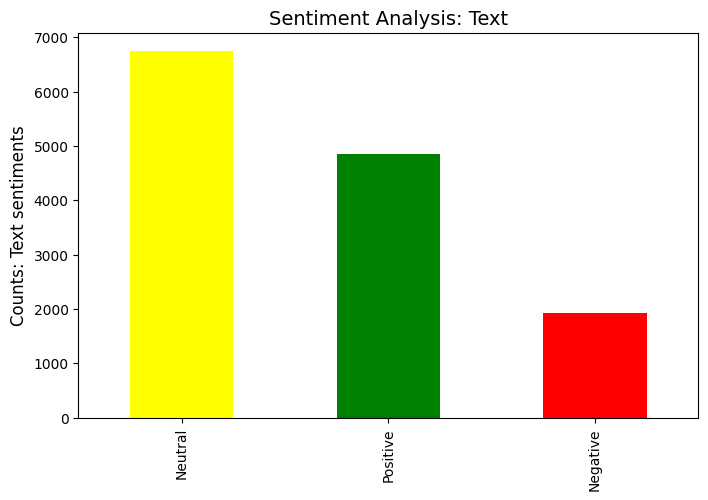

In [47]:
dataset['Sentimented_Texts'] = dataset['Text'].apply(lambda x: sentiment_type(x))
plots(dataset, 'Sentimented_Texts', 'Text')

# **TASK 2: USER CLASSIFICATION**



In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [48]:
X = dataset['ProcessedText']
y = dataset['Username']

In [49]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


**Applying the KNN Model to classify the tweets**

In [52]:
# Train the kNN model
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [54]:
# Predict on the testing set
y_pred = KNN_model.predict(X_test_tfidf)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# SINCE THE KNN MODEL IS APPLIED ON THE SENTIMENTED TEXTS, THEREFORE THE ACCURACY IS LOW

Accuracy: 0.07464892830746489
Precision: 0.027808156755525178
Recall: 0.03307064452575288
F1-score: 0.028501089122340603


# **TASK 3: CLUSTERING**

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [69]:
# Define the feature set
features = dataset['hashtag']  # You can change this to other features like hashtags if desired


In [70]:
# Vectorize the feature data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(features)

In [71]:
# Apply k-means clustering
clusters_no = 5  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=clusters_no, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [72]:
# Assign cluster labels
cluster_labels = kmeans.labels_

In [73]:
# Visualize the clusters
# Perform dimensionality reduction for visualization (e.g., using PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

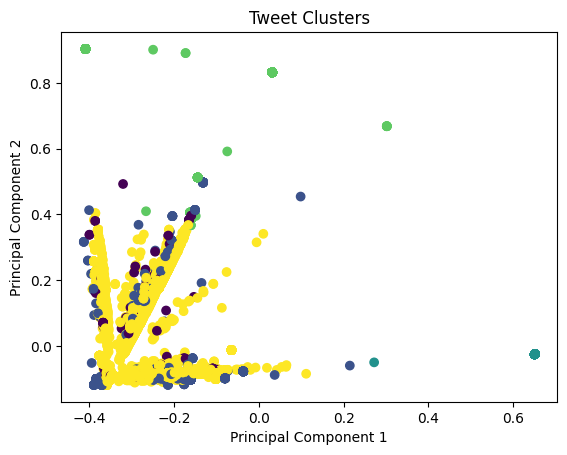

In [74]:
# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Tweet Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
